### Eleonora Bellasio
# <span style="color:maroon">Laboratorio di Simulazine Numerica: Esercitazione 6

### <span style="color:seagreen">Esercizio 06.1

Rappresento le grandezze
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

come funzione di $T$ nel range $\left[0.5;2.0\right]$ per un sistema di $N=50$ spins con $J=1$. 

Utilizzo il metodo del data blocking e rappresento anche l'incertezza statistica.
Nello stesso grafico rappresento il risultato ottenuto utilizzando sia l'algoritmo di Metropolis sia quello di Gibbs. Confronto il risultato con la curva esatta ricavata dal calcolo analitico.

#### <span style="color:dodgerblue">Energia Interna

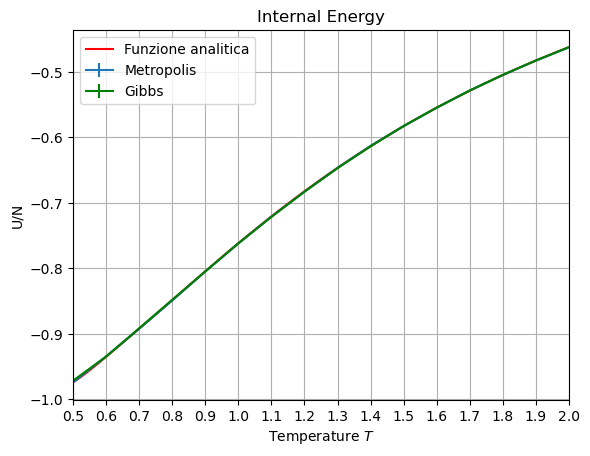

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import os,sys
import pandas as pd
 

dinp = "Esercitazione_6/06.1/OUTPUT_FINALI/"
finp1 = dinp + "total_energy_metropolis.dat"
finp2 = dinp + "total_energy_gibbs.dat"

if not os.path.isfile(finp1):
    sys.exit( "file does not exist: " + finp1 )

if not os.path.isfile(finp2):
    sys.exit( "file does not exist: " + finp2 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp1, sep='\\s+', comment='#', names=['BLOCK:','TE:','AVE_TE:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp2, sep='\\s+', comment='#', names=['BLOCK:','TE:','AVE_TE:','ERROR:','TEMPERATURE:'])
#print (df) 
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]
#print (df_block20)

# Funzione analitica
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

#Metropolis, Gibbs e funzione analitica
plt.errorbar(df_block20_metro['TEMPERATURE:'],df_block20_metro['AVE_TE:'],yerr=df_block20_metro['ERROR:'], label='Metropolis')
plt.errorbar(df_block20_gibbs['TEMPERATURE:'],df_block20_gibbs['AVE_TE:'],yerr=df_block20_gibbs['ERROR:'], label='Gibbs', color='green')
plt.plot(T, e, label='Funzione analitica', color='red')
#plt.plot(x, y_fit, color='coral', marker='o', linestyle='none', linewidth=2, markersize=2, zorder=1) 
plt.xlabel('Temperature $T$')
plt.xlim([0.5,2.0])
plt.xticks(df_block20_metro['TEMPERATURE:'])
plt.ylabel('U/N')
#plt.ylim([-0.7,-0.6])
plt.legend()
plt.grid(True)
plt.title("Internal Energy")
plt.show()


#### <span style="color:dodgerblue">Calore Specifico

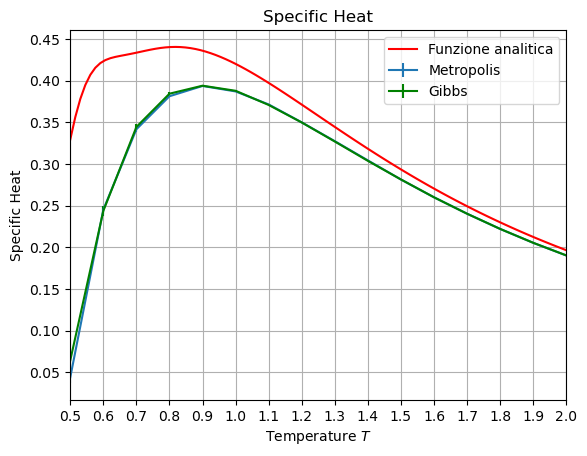

In [55]:
dinp = "Esercitazione_6/06.1/OUTPUT_FINALI/"
finp3 = dinp + "specific_heat_metropolis.dat"
finp4 = dinp + "specific_heat_gibbs.dat"

if not os.path.isfile(finp3):
    sys.exit( "file does not exist: " + finp3 )

if not os.path.isfile(finp4):
    sys.exit( "file does not exist: " + finp4 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp3, sep='\\s+', comment='#', names=['BLOCK:','SH:','AVE_SH:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp4, sep='\\s+', comment='#', names=['BLOCK:','SH:','AVE_SH:','ERROR:','TEMPERATURE:'])
#print (df) 
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]
#print (df_block20)

# Funzione analitica
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#Metropolis, Gibbs e funzione analitica
plt.errorbar(df_block20_metro['TEMPERATURE:'],df_block20_metro['AVE_SH:'],yerr=df_block20_metro['ERROR:'], label='Metropolis')
plt.errorbar(df_block20_gibbs['TEMPERATURE:'],df_block20_gibbs['AVE_SH:'],yerr=df_block20_gibbs['ERROR:'], label='Gibbs', color='green')
plt.plot(T, heat, label='Funzione analitica', color='red')
#plt.plot(x, y_fit, color='coral', marker='o', linestyle='none', linewidth=2, markersize=2, zorder=1) 
plt.xlabel('Temperature $T$')
plt.xlim([0.5,2.0])
plt.xticks(df_block20_metro['TEMPERATURE:'])
plt.ylabel('Specific Heat')
#plt.ylim([-0.7,-0.6])
plt.legend()
plt.grid(True)
plt.title("Specific Heat")
plt.show()


#### <span style="color:dodgerblue">Magnetizzazione

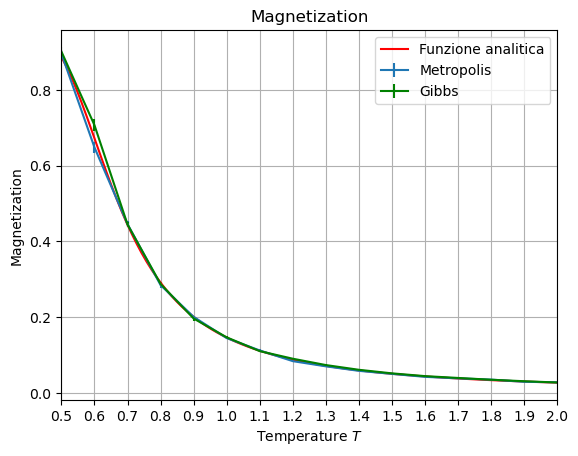

In [57]:
dinp = "Esercitazione_6/06.1/OUTPUT_FINALI/"
finp5 = dinp + "magnetization_metropolis.dat"
finp6 = dinp + "magnetization_gibbs.dat"

if not os.path.isfile(finp5):
    sys.exit( "file does not exist: " + finp5 )

if not os.path.isfile(finp6):
    sys.exit( "file does not exist: " + finp6 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp5, sep='\\s+', comment='#', names=['BLOCK:','MAG:','AVE_MAG:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp6, sep='\\s+', comment='#', names=['BLOCK:','MAG:','AVE_MAG:','ERROR:','TEMPERATURE:'])
#print (df) 
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]
#print (df_block20)

# Funzione analitica
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#Metropolis, Gibbs e funzione analitica
plt.errorbar(df_block20_metro['TEMPERATURE:'],df_block20_metro['AVE_MAG:'],yerr=df_block20_metro['ERROR:'], label='Metropolis')
plt.errorbar(df_block20_gibbs['TEMPERATURE:'],df_block20_gibbs['AVE_MAG:'],yerr=df_block20_gibbs['ERROR:'], label='Gibbs', color='green')
plt.plot(T, M, label='Funzione analitica', color='red')
#plt.plot(x, y_fit, color='coral', marker='o', linestyle='none', linewidth=2, markersize=2, zorder=1) 
plt.xlabel('Temperature $T$')
plt.xlim([0.5,2.0])
plt.xticks(df_block20_metro['TEMPERATURE:'])
plt.ylabel('Magnetization')
#plt.ylim([-0.7,-0.6])
plt.legend()
plt.grid(True)
plt.title("Magnetization")
plt.show()

#### <span style="color:dodgerblue">Suscettibilità

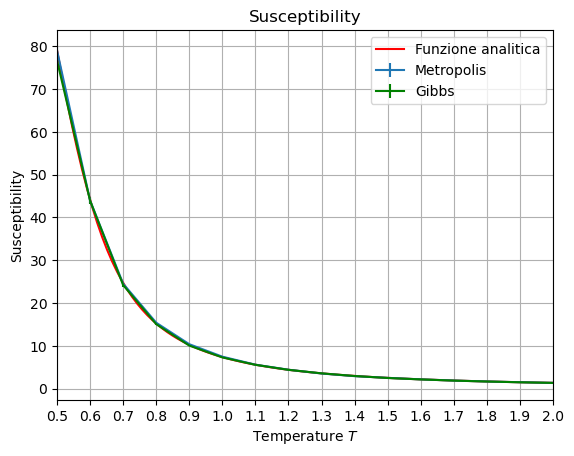

In [59]:
dinp = "Esercitazione_6/06.1/OUTPUT_FINALI/"
finp7 = dinp + "susceptibility_metropolis.dat"
finp8 = dinp + "susceptibility_gibbs.dat"

if not os.path.isfile(finp7):
    sys.exit( "file does not exist: " + finp7 )

if not os.path.isfile(finp8):
    sys.exit( "file does not exist: " + finp8 )

#Metto i dati di output in un dataframe
#Indico che il separatore di campo non è la virgola (default) ma una serie di spazi
#Consodeo tutte le righe che iniziano con # come commenti, qundi non entrano nel dataframe
#Siccome ho eliminato l'intestazione ricreo l'header con name=[...]
df_metro = pd.read_csv(finp7, sep='\\s+', comment='#', names=['BLOCK:','CHI:','AVE_CHI:','ERROR:','TEMPERATURE:'])
df_gibbs = pd.read_csv(finp8, sep='\\s+', comment='#', names=['BLOCK:','CHI:','AVE_CHI:','ERROR:','TEMPERATURE:'])
#print (df) 
#Seleziono i dati del 20-esimo blocco per ogni temperatura da inserire nel grafico
df_block20_metro = df_metro[df_metro['BLOCK:'] == 20]
df_block20_gibbs = df_gibbs[df_gibbs['BLOCK:'] == 20]
#print (df_block20)

# Funzione analitica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#Metropolis, Gibbs e funzione analitica
plt.errorbar(df_block20_metro['TEMPERATURE:'],df_block20_metro['AVE_CHI:'],yerr=df_block20_metro['ERROR:'], label='Metropolis')
plt.errorbar(df_block20_gibbs['TEMPERATURE:'],df_block20_gibbs['AVE_CHI:'],yerr=df_block20_gibbs['ERROR:'], label='Gibbs', color='green')
plt.plot(T, X, label='Funzione analitica', color='red')
#plt.plot(x, y_fit, color='coral', marker='o', linestyle='none', linewidth=2, markersize=2, zorder=1) 
plt.xlabel('Temperature $T$')
plt.xlim([0.5,2.0])
plt.xticks(df_block20_metro['TEMPERATURE:'])
plt.ylabel('Susceptibility')
#plt.ylim([-0.7,-0.6])
plt.legend()
plt.grid(True)
plt.title("Susceptibility")
plt.show()